In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os.path


In [2]:
train_labels=[]
train_samples=[]

In [3]:
for i in range (50):  
# The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

# The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range (1000):
# The 5% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)  

# The 5% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples: 
    print(i)

29
79
35
91
34
66
55
71
20
74
19
81
20
88
42
99
50
100
55
69
21
67
45
73
59
72
44
95
35
95
17
91
50
92
44
71
33
84
59
92
15
70
50
92
15
86
29
98
41
66
42
92
26
74
38
98
51
84
47
73
50
67
40
90
22
67
14
70
34
78
60
88
35
70
29
96
44
84
29
98
32
96
37
97
25
80
41
74
29
91
55
93
39
92
40
74
27
69
41
100
17
90
47
69
53
89
16
67
23
94
39
87
36
97
59
81
51
91
20
97
56
69
16
80
34
71
52
97
43
69
36
86
18
86
20
81
35
94
51
88
20
91
16
67
49
69
22
66
34
87
25
94
41
94
35
86
52
91
48
68
46
75
56
83
43
72
23
97
56
67
46
99
35
81
43
69
53
100
54
71
35
90
13
96
38
89
54
86
54
71
15
87
49
75
22
70
28
81
62
98
58
94
25
73
15
70
52
69
59
69
59
68
56
89
31
75
35
82
63
94
47
78
61
99
58
73
29
70
25
91
25
74
61
86
31
97
54
73
56
70
24
65
42
83
51
78
29
91
27
84
52
75
56
97
63
98
33
82
50
99
33
77
29
99
14
95
48
100
17
89
19
94
19
78
55
82
55
92
50
75
54
85
31
86
59
91
31
68
64
81
48
88
43
83
30
75
56
96
40
78
43
89
48
73
42
92
16
79
50
68
27
100
59
70
26
76
35
73
49
90
62
96
28
67
24
88
61
94
19
93
17
72

In [5]:
for i in train_labels: 
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples=np.array(train_samples)
train_labels, train_samples=shuffle(train_labels, train_samples)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples: 
    print(i)

[0.74712644]
[0.47126437]
[0.57471264]
[0.94252874]
[0.27586207]
[0.64367816]
[0.08045977]
[0.94252874]
[0.86206897]
[0.34482759]
[0.5862069]
[0.36781609]
[0.37931034]
[0.91954023]
[0.57471264]
[0.87356322]
[0.85057471]
[0.04597701]
[0.71264368]
[0.94252874]
[0.5862069]
[0.98850575]
[0.29885057]
[0.85057471]
[0.65517241]
[0.35632184]
[0.89655172]
[0.56321839]
[0.33333333]
[0.45977011]
[0.18390805]
[0.63218391]
[0.40229885]
[0.03448276]
[0.83908046]
[0.97701149]
[0.1954023]
[0.7816092]
[0.48275862]
[0.54022989]
[0.55172414]
[0.32183908]
[0.63218391]
[0.22988506]
[0.88505747]
[0.12643678]
[0.94252874]
[0.32183908]
[0.43678161]
[0.79310345]
[0.75862069]
[0.7816092]
[0.28735632]
[0.20689655]
[0.08045977]
[0.62068966]
[0.43678161]
[0.97701149]
[0.08045977]
[0.59770115]
[0.57471264]
[0.66666667]
[0.1954023]
[0.93103448]
[0.3908046]
[0.12643678]
[0.48275862]
[0.74712644]
[0.8045977]
[0.91954023]
[0.62068966]
[0.40229885]
[0.79310345]
[0.54022989]
[0.51724138]
[0.81609195]
[0.34482759]
[0.2643

[0.93103448]
[0.14942529]
[0.65517241]
[0.63218391]
[0.31034483]
[0.90804598]
[0.63218391]
[0.96551724]
[0.02298851]
[0.32183908]
[0.35632184]
[0.03448276]
[0.98850575]
[0.96551724]
[0.89655172]
[0.52873563]
[0.25287356]
[0.32183908]
[0.88505747]
[0.3908046]
[0.96551724]
[0.12643678]
[0.49425287]
[0.3908046]
[0.93103448]
[0.97701149]
[0.40229885]
[0.08045977]
[0.09195402]
[0.06896552]
[0.8045977]
[0.28735632]
[0.85057471]
[0.49425287]
[0.35632184]
[0.93103448]
[0.81609195]
[0.22988506]
[0.48275862]
[0.13793103]
[0.2183908]
[0.74712644]
[0.28735632]
[0.86206897]
[0.44827586]
[0.85057471]
[0.4137931]
[0.56321839]
[0.90804598]
[0.75862069]
[0.97701149]
[0.25287356]
[0.44827586]
[0.57471264]
[0.12643678]
[0.33333333]
[0.67816092]
[0.97701149]
[0.54022989]
[0.29885057]
[0.8045977]
[0.49425287]
[0.04597701]
[0.5862069]
[0.81609195]
[0.14942529]
[0.70114943]
[0.4137931]
[0.33333333]
[0.91954023]
[0.09195402]
[0.66666667]
[0.73563218]
[1.]
[0.33333333]
[0.83908046]
[0.06896552]
[0.57471264]
[0

In [9]:
model = Sequential ([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6689 - accuracy: 0.5635 - val_loss: 0.6542 - val_accuracy: 0.6000 - 479ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6432 - accuracy: 0.6339 - val_loss: 0.6276 - val_accuracy: 0.6714 - 108ms/epoch - 570us/step
Epoch 3/30
189/189 - 0s - loss: 0.6181 - accuracy: 0.6899 - val_loss: 0.6015 - val_accuracy: 0.7429 - 111ms/epoch - 586us/step
Epoch 4/30
189/189 - 0s - loss: 0.5891 - accuracy: 0.7434 - val_loss: 0.5709 - val_accuracy: 0.7762 - 116ms/epoch - 612us/step
Epoch 5/30
189/189 - 0s - loss: 0.5602 - accuracy: 0.7799 - val_loss: 0.5440 - val_accuracy: 0.8048 - 187ms/epoch - 987us/step
Epoch 6/30
189/189 - 0s - loss: 0.5335 - accuracy: 0.8069 - val_loss: 0.5179 - val_accuracy: 0.8190 - 111ms/epoch - 586us/step
Epoch 7/30
189/189 - 0s - loss: 0.5077 - accuracy: 0.8312 - val_loss: 0.4931 - val_accuracy: 0.8333 - 122ms/epoch - 644us/step
Epoch 8/30
189/189 - 0s - loss: 0.4832 - accuracy: 0.8407 - val_loss: 0.4697 - val_accuracy: 0.8381 - 156ms/epoch

In [13]:
test_labels=[]
test_samples=[]

In [14]:
for i in range (50):  
# The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

# The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range (1000):
# The 5% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)  

# The 5% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
test_labels = np.array(test_labels)
test_samples=np.array(test_samples)
test_labels, test_samples=shuffle(test_labels, test_samples)

In [16]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

Predict

In [17]:
predictions=model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [18]:
for i in predictions: 
    print(i)

[0.7406857  0.25931427]
[0.9568181  0.04318187]
[0.60704696 0.39295304]
[0.54712677 0.4528732 ]
[0.07440598 0.92559403]
[0.03346631 0.9665337 ]
[0.42491537 0.5750846 ]
[0.8565688  0.14343119]
[0.9589045  0.04109546]
[0.48580888 0.5141911 ]
[0.9589045  0.04109546]
[0.9561004  0.04389955]
[0.45519462 0.54480547]
[0.04035664 0.9596433 ]
[0.96009904 0.03990103]
[0.90710384 0.09289615]
[0.95266306 0.0473369 ]
[0.05167893 0.94832104]
[0.04568498 0.95431495]
[0.04859431 0.9514057 ]
[0.04294195 0.9570581 ]
[0.054948 0.945052]
[0.9568181  0.04318187]
[0.23810536 0.76189464]
[0.3112411  0.68875897]
[0.07440598 0.92559403]
[0.42491537 0.5750846 ]
[0.3112411  0.68875897]
[0.23810536 0.76189464]
[0.95573735 0.04426265]
[0.3381836  0.66181636]
[0.9560639 0.0439361]
[0.26111692 0.73888314]
[0.8842111  0.11578891]
[0.9169567  0.08304326]
[0.9491941  0.05080592]
[0.04859431 0.9514057 ]
[0.94485855 0.05514145]
[0.05841116 0.9415888 ]
[0.04568498 0.95431495]
[0.95957834 0.04042168]
[0.71638733 0.28361264

[0.90710384 0.09289615]
[0.9603502  0.03964982]
[0.785057 0.214943]
[0.80507296 0.1949271 ]
[0.95511043 0.04488953]
[0.16046256 0.83953744]
[0.9579131  0.04208684]
[0.03143274 0.96856725]
[0.04568498 0.95431495]
[0.054948 0.945052]
[0.9604289  0.03957108]
[0.02951899 0.97048104]
[0.6639091 0.3360909]
[0.3951891  0.60481095]
[0.9589045  0.04109546]
[0.87101954 0.1289805 ]
[0.054948 0.945052]
[0.95991117 0.04008879]
[0.054948 0.945052]
[0.9571727  0.04282724]
[0.51653    0.48347002]
[0.8962142  0.10378574]
[0.785057 0.214943]
[0.07440598 0.92559403]
[0.11675117 0.8832488 ]
[0.96009904 0.03990103]
[0.05841116 0.9415888 ]
[0.95266306 0.0473369 ]
[0.04859431 0.9514057 ]
[0.09375073 0.9062492 ]
[0.8842111  0.11578891]
[0.08445594 0.91554403]
[0.840795   0.15920502]
[0.3112411  0.68875897]
[0.07006508 0.9299349 ]
[0.02771839 0.9722817 ]
[0.04859431 0.9514057 ]
[0.3112411  0.68875897]
[0.9604289  0.03957108]
[0.9588096  0.04119036]
[0.09375073 0.9062492 ]
[0.04568498 0.95431495]
[0.9604289  0.

In [19]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [20]:
for i in rounded_predictions: 
    print(i)

0
0
0
0
1
1
1
0
0
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
0
1
0
1
1
0
1
1
1
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
0
1
0
1
0
0
0
1
0
1
0
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
1
0
0


In [21]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize: 
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusionmatrix")
    else: 
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh=cm.max()/2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[ 947  103]
 [  46 1004]]


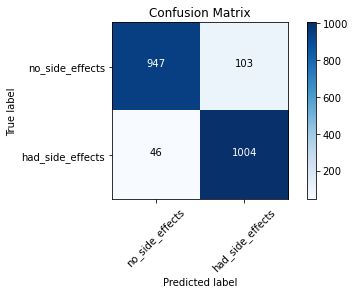

In [25]:
cm_plot_labels=["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

1. model.save()

In [26]:
# Check first to see if file exists already.
# If not, the model is saved to disk. 
if os.path.isfile("models/medical_trial_model.h5") is False: 
    model.save("models/medical_trial_model.h5")

In [27]:
from tensorflow.keras.models import load_model
new_model=load_model("models/medical_trial_model.h5")

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[ 0.46021304,  0.56131774, -0.12187493, -0.4333644 , -0.42460388,
          0.19241226,  0.6163726 , -0.44573426,  0.67416716, -0.2886081 ,
         -0.35177463,  0.56469345, -0.00067823,  0.3393725 , -0.4668771 ,
         -0.4111935 ]], dtype=float32),
 array([-0.130985  , -0.14918105,  0.        ,  0.        ,  0.        ,
         0.21912847, -0.08714677,  0.        , -0.13328826,  0.        ,
         0.        , -0.15240595, -0.00086341,  0.19339736,  0.        ,
         0.        ], dtype=float32),
 array([[ 3.12412232e-01, -1.54809251e-01, -2.96553131e-02,
         -2.79814273e-01, -5.37449718e-02, -2.97926217e-01,
         -4.22352970e-01,  3.71817052e-01,  3.31549793e-02,
         -4.25988346e-01,  3.57330382e-01,  1.76477119e-01,
         -5.58235466e-01,  3.05099159e-01,  1.96092933e-01,
         -1.76116183e-01, -2.43844390e-01,  8.22934806e-02,
         -1.24841206e-01, -2.40721881e-01,  3.60478938e-01,
         -1.49419576e-01, -2.52220213e-01, -2.85972774e-01,
 

2. model.to_json()

In [31]:
# save as JSON
json_string=model.to_json()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [33]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [34]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
